# Lab - Projeto de filtro

Esta atividade consiste em projetar diferentes filtros IIR e FIR com a menor ordem para atender uma mesma especificação.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *
from tabulate import tabulate

Projete filtros IIR (Butterworth, Chebyshev tipo 1, Chebyshev tipo 2, Elíptico) e FIR (janela de Kaiser, Equiripple (Parks-McLellan)) com a menor ordem que atendam a seguinte especificação:

Passa-baixas<br>
Frequencia da extremidade da banda passante: $0.22\pi$<br>
Ganho máximo na banda passante: 0 dB<br>
Ganho mínimo na banda passante: -1 dB<br>
Frequencia da extremidade da banda de rejeição: $0.29\pi$<br>
Ganho máximo na banda de rejeição: -40 dB<br>


1) Plotar a magnitude dos ganhos no mesmo gráfico em escala linear e logaritmica.

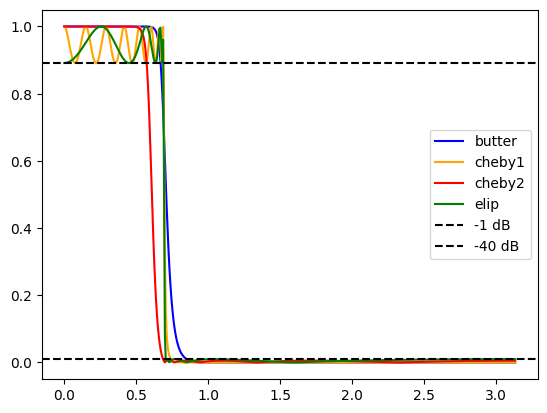

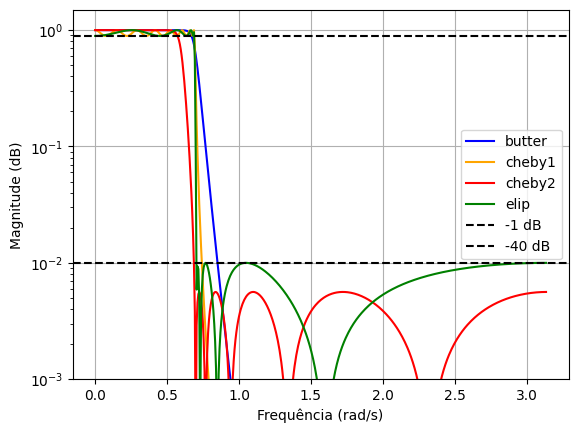

In [59]:
freq_corte = 0.22
but_b, but_a = butter(20, freq_corte)
w, but_h= freqz(but_b, but_a)
che1_b, che1_a = cheby1(15,1, freq_corte)
w, che1_h= freqz(che1_b, che1_a)
che2_b, che2_a = cheby2(10,45, freq_corte)
w, che2_h= freqz(che2_b, che2_a)
ell_b, ell_a = ellip(8,1, 40, freq_corte)
w, ell_h= freqz(ell_b, ell_a)
kaiser_coefficients = firwin(8 + 1, freq_corte, window=('kaiser',5), fs=2*pi)
w, h_kaiser = freqz(kaiser_coefficients,1)

# plt, axis = plt.subplots(2, 1, figsize=(8, 6))
figure()
plot(w, abs(but_h), label="butter", color='blue')
plot(w, abs(che1_h), label="cheby1", color='orange')
plot(w, abs(che2_h), label="cheby2", color='red')
plot(w, abs(ell_h), label="elip"  , color='green')
plt.axhline(y=10**(-1/20), color='black', linestyle='--', label="-1 dB")
plt.axhline(y=10**(-40/20), color='black', linestyle='--', label="-40 dB")

legend()
figure()
semilogy(w, abs(but_h), label="butter", color='blue')
semilogy(w, abs(che1_h), label="cheby1", color='orange')
semilogy(w, abs(che2_h), label="cheby2", color='red')
semilogy(w, abs(ell_h), label="elip"  , color='green')
plt.axhline(y=10**(-1/20), color='black', linestyle='--', label="-1 dB")
plt.axhline(y=10**(-40/20), color='black', linestyle='--', label="-40 dB")
legend()

# Adiciona as linhas pontilhadas de -1dB a -40 dB
plt.ylim([10**-3, 1.5])
# Configura os eixos
# plt.xlim([0, freq_corte * 2])
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequência (rad/s)")
plt.grid(True)

# Mostra os gráficos
plt.show()

2) Resumir numa tabela, a ordem de cada filtro, a frequência de corte normalizada e o valor beta do filtro de Kaiser.

Filtro Ordem Freq Beta
--------------------------------
